In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from scipy.sparse import lil_matrix, csr_matrix
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('data/filtered_df2.csv')
image_files = list(df['Image'])

for i in range(0, len(image_files), 32): #batch size is 32
    print(i)
    batch_files = image_files[i:i+32]
    batch_features = []
    for file in batch_files:
        img = Image.open("data/eyeball_img/" + file).convert('RGB')
        # Split into 3 channels
        #r, g, b = img.split()
        img_array = np.asarray(img, dtype=np.float32) / 255.0
        batch_features.append(img_array.flatten())
    batch_features = np.array(batch_features)    

In [19]:
embedding = SpectralEmbedding(n_components=3)
X_transformed = embedding.fit_transform(batch_features[0:20])
X_transformed.shape

c:\Users\Debbie Olorunisola\anaconda3\envs\inter_env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


(20, 3)

In [20]:
df = df[0:20]
df['x'] = X_transformed[:, 0]  # first coord
df['y'] = X_transformed[:, 1]  # second coord
df['z'] = X_transformed[:, 2]  # third coord

In [21]:
colors = []
for index, row in df.iterrows():
    if row['N'] == 1:
        colors.append('grey')
    elif row['D'] == 1:
        colors.append('red')
    elif row['G'] == 1:
        colors.append('yellow')
    elif row['C'] == 1:
        colors.append('green')
    elif row['A'] == 1:
        colors.append('orange')
    elif row['H'] == 1:
        colors.append('pink')
    elif row['M'] == 1:
        colors.append('blue')
    elif row['O'] == 1:
        colors.append('purple')

<Axes: xlabel='x', ylabel='y'>

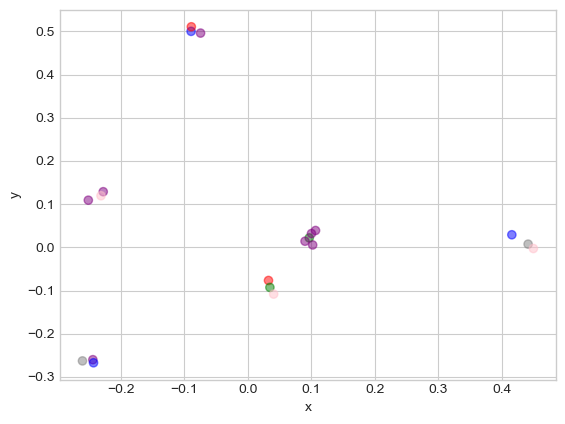

In [43]:
import seaborn as sns

sns.regplot(x='x',
            y='y',
            data=df,
            fit_reg=False,  # do not fit a regression line
            x_jitter=0.02,  # could also dynamically set this with range of data
            y_jitter=0.02,
            scatter_kws={'alpha': 0.5, 'color': colors}) # set transparency to 50% , use colors

C:\Users\Debbie Olorunisola\AppData\Local\Temp\ipykernel_19372\3708198444.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


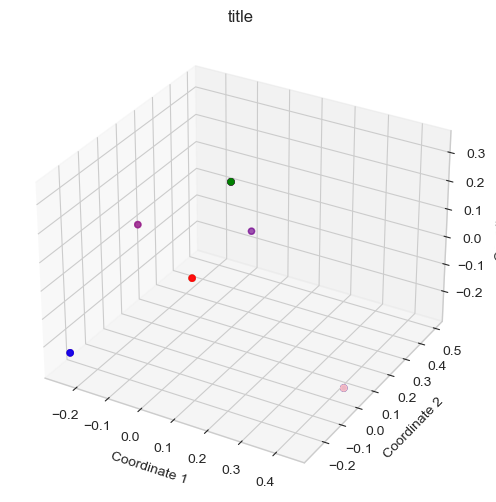

In [24]:

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df['x'], df['y'], df['z'], c = colors, cmap = None)
plt.grid(True)
ax.axis('on')
plt.title("title")
ax.set_xlabel('Coordinate {}'.format(1))
ax.set_ylabel('Coordinate {}'.format(2))
ax.set_zlabel('Coordinate {}'.format(3))
plt.show()